**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 2**
Pandas para el análisis de datos en Python

---

*   NOMBRE: Angel Kociankowski
*   MATRÍCULA: A01379225


---

En esta actividad usarás el archivo de datos `LaqnData.csv`. Cada fila de este conjunto de datos muestra un registro de medición, por hora, de uno de los siguientes cinco contaminantes del aire:

*   `NO` (óxido nítrico)
*   `NO2` (dióxido de nitrógeno)
*   `NOX` (óxidos nitrosos)
*   `PM10` (partículas suspendidas con un diámetro aerodinámico igual o menor a 10 micrómetros)
*   `PM2.5` (partículas suspendidas con un diámetro aerodinámico igual o menor a 2.5 micrómetros)

Los datos se recopilaron en una ubicación de Londres durante todo el año 2017.

**NOTA IMPORTANTE:** Asegúrate de responder *explícitamente* todos los cuestionamientos.


1.	Descarga el archivo: `LaqnData.csv` y guarda, en un dataframe (`air_df`), todos sus registros.
*   Observa la estructura y contenido del dataframe con los atributos y métodos estudiados (`shape`, `columns`, `head()`, `tail()`, `dtypes`)
*   Calcula el porcentaje de valores faltantes por columna.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
from google.colab import files
uploaded = files.upload()

Saving LaqnData.csv to LaqnData.csv


In [6]:
air_df = pd.read_csv("LaqnData.csv")


In [7]:
print("Shape del dataframe:", air_df.shape)
print("Columnas:", air_df.columns)
print("Primeras filas del dataframe:")
display(air_df.head())
print("Últimas filas del dataframe:")
display(air_df.tail())
print("Tipos de datos:")
print(air_df.dtypes)
print("Valores nulos por columna:")
print(air_df.isna().sum())


Shape del dataframe: (43800, 6)
Columnas: Index(['Site', 'Species', 'ReadingDateTime', 'Value', 'Units',
       'Provisional or Ratified'],
      dtype='object')
Primeras filas del dataframe:


,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
0,CT3,NO,01/01/2017 00:00,3.5,ug m-3,R
1,CT3,NO,01/01/2017 01:00,3.6,ug m-3,R
2,CT3,NO,01/01/2017 02:00,2.2,ug m-3,R
3,CT3,NO,01/01/2017 03:00,2.1,ug m-3,R
4,CT3,NO,01/01/2017 04:00,3.3,ug m-3,R


Últimas filas del dataframe:


,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
43795,CT3,PM2.5,31/12/2017 19:00,-2.0,ug m-3,R
43796,CT3,PM2.5,31/12/2017 20:00,6.0,ug m-3,R
43797,CT3,PM2.5,31/12/2017 21:00,5.0,ug m-3,R
43798,CT3,PM2.5,31/12/2017 22:00,5.0,ug m-3,R
43799,CT3,PM2.5,31/12/2017 23:00,6.0,ug m-3,R


Tipos de datos:
Site                        object
Species                     object
ReadingDateTime             object
Value                      float64
Units                       object
Provisional or Ratified     object
dtype: object
Valores nulos por columna:
Site                          0
Species                       0
ReadingDateTime               0
Value                      3230
Units                         0
Provisional or Ratified       0
dtype: int64


2.	Obtén la cantidad de valores únicos por columna (`nunique()`) para responder:


*   ¿Cuántas mediciones se hicieron?
*   ¿Cuántos contaminantes del aire (`Species`) se analizaron?
*   ¿Qué columnas no agregan ningún valor informativo porque el mismo valor en todo el conjunto de datos? Elimínalas del dataframe.
*   La columna `Units` tampoco posee valor informativo. Verifícalo con la función `unique()` y elimínala del dataframe.

3.	Realiza el conteo de valores por categoría (`value_counts()`) para la columna `Species` y determina si las lecturas de cada contaminante coincide con el total de mediciones.

In [10]:
unique_counts = air_df.nunique()
print("Cantidad de valores únicos por columna:")
print(unique_counts)

mediciones = unique_counts['ReadingDateTime']
print(f"\nSe hicieron {mediciones} mediciones.")

contaminantes = unique_counts['Species']
print(f"Se analizaron {contaminantes} contaminantes del aire.")

constant_columns = unique_counts[unique_counts == 1].index.tolist()
print(f"\nColumnas constantes (sin valor informativo): {constant_columns}")

units_unique = air_df['Units'].unique()
print(f"\nValores únicos en la columna 'Units': {units_unique}")

columns_to_drop = constant_columns + ['Units']
air_df_cleaned = air_df.drop(columns=columns_to_drop)

print("\nColumnas eliminadas: ", columns_to_drop)
print("\nEstructura del DataFrame limpio:")
print(air_df_cleaned.head())


Cantidad de valores únicos por columna:
Site                          1
Species                       5
ReadingDateTime            8760
Value                      1847
Units                         3
Provisional or Ratified       1
dtype: int64

Se hicieron 8760 mediciones.
Se analizaron 5 contaminantes del aire.

Columnas constantes (sin valor informativo): ['Site', 'Provisional or Ratified']

Valores únicos en la columna 'Units': ['ug m-3' 'ug m-3 as NO2' 'ug/m3']

Columnas eliminadas:  ['Site', 'Provisional or Ratified', 'Units']

Estructura del DataFrame limpio:
  Species   ReadingDateTime  Value
0      NO  01/01/2017 00:00    3.5
1      NO  01/01/2017 01:00    3.6
2      NO  01/01/2017 02:00    2.2
3      NO  01/01/2017 03:00    2.1
4      NO  01/01/2017 04:00    3.3


¿Cuántas mediciones se hicieron?

Se realizaron 8,760 mediciones.

¿Cuántos contaminantes del aire (Species) se analizaron?

Se analizaron 5 contaminantes.

¿Qué columnas no agregan ningún valor informativo porque tienen el mismo valor en todo el conjunto de datos?

Las columnas Site y Provisional or Ratified tienen un único valor constante, por lo que no aportan información que sea relevante.

¿La columna Units aporta valor informativo?

La columna Units tiene tres variaciones ('ug m-3', 'ug m-3 as NO2', y 'ug/m3'), pero no considero que tengan valor informativo ya que carecen de relevancia en el cotnexto actual.

4.	Utiliza la función `groupby()` para determinar el promedio del valor por

*   List item
*   List item

contaminante.

In [11]:
average_by_species = air_df_cleaned.groupby('Species')['Value'].mean()
print("\nPromedio del valor por contaminante:")
print(average_by_species)


Promedio del valor por contaminante:
Species
NO       15.045115
NO2      38.010185
NOX      61.078661
PM10     22.551704
PM2.5    14.999831
Name: Value, dtype: float64


5.	El conjunto de datos está en un formato largo. Aplique la función

*   List item

*   List item
*   List item


*   List item

apropiada para cambiarlo al formato ancho (`ReadingDateTime` como índice y cada contaminante en una columna). Nombre el dataframe resultante como `pvt_df`.

In [12]:
pvt_df = air_df_cleaned.pivot(index='ReadingDateTime', columns='Species', values='Value')
print("\nEstructura del DataFrame en formato ancho:")
print(pvt_df.head())


Estructura del DataFrame en formato ancho:
Species            NO   NO2   NOX  PM10  PM2.5
ReadingDateTime                               
01/01/2017 00:00  3.5  30.8  36.2  35.7    NaN
01/01/2017 01:00  3.6  31.5  37.0  28.5    NaN
01/01/2017 02:00  2.2  27.3  30.7  22.7    NaN
01/01/2017 03:00  2.1  23.5  26.8  20.5    NaN
01/01/2017 04:00  3.3  28.0  33.0  22.1    NaN


6.	A través de la función `describe()` responde:

*   ¿Cuál es el mayor valor de `NO2` registrado? ¿A qué día pertenece?
*   ¿Cuál es el menor valor de `PM10` registrado?¿A qué día pertenece?
*   ¿Cuál es la mediana del `NO`? ¿Cómo se interpreta?
*   ¿Cuál es el primer cuartil de `PM2.5`? ¿Qué significa?

In [21]:
max_no2 = air_df[air_df['Species'] == 'NO2']['Value'].max()
max_no2_date = air_df[(air_df['Species'] == 'NO2') & (air_df['Value'] == max_no2)]['ReadingDateTime'].iloc[0]

min_pm10 = air_df[air_df['Species'] == 'PM10']['Value'].min()
min_pm10_date = air_df[(air_df['Species'] == 'PM10') & (air_df['Value'] == min_pm10)]['ReadingDateTime'].iloc[0]

median_no = air_df[air_df['Species'] == 'NO']['Value'].median()

q1_pm25 = air_df[air_df['Species'] == 'PM2.5']['Value'].quantile(0.25)

print(f"Mayor valor de NO2: {max_no2} registrado el día {max_no2_date}")
print(f"Menor valor de PM10: {min_pm10} registrado el día {min_pm10_date}")
print(f"Mediana del NO: {median_no}")
print(f"Primer cuartil de PM2.5: {q1_pm25}")
print("El primer cuartil de PM2.5, que es 7.0, significa que en el 25% de las mediciones, los niveles de partículas finas en el aire fueron iguales o menores a 7.0, lo que representa los momentos de menor contaminación.")










Mayor valor de NO2: 120.2 registrado el día 24/01/2017 19:00
Menor valor de PM10: -5.6 registrado el día 12/09/2017 23:00
Mediana del NO: 7.1
Primer cuartil de PM2.5: 7.0
El primer cuartil de PM2.5, que es 7.0, significa que en el 25% de las mediciones, los niveles de partículas finas en el aire fueron iguales o menores a 7.0, lo que representa los momentos de menor contaminación.


7.	Dibuja un histograma para cada columna de `pvt_df`. ¿Qué contaminante tiene mayor variabilidad?

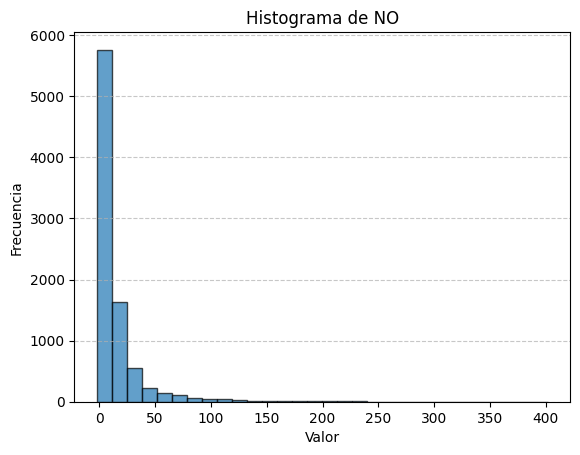

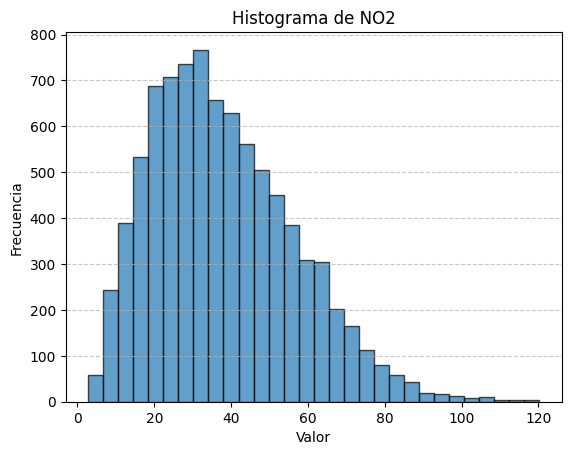

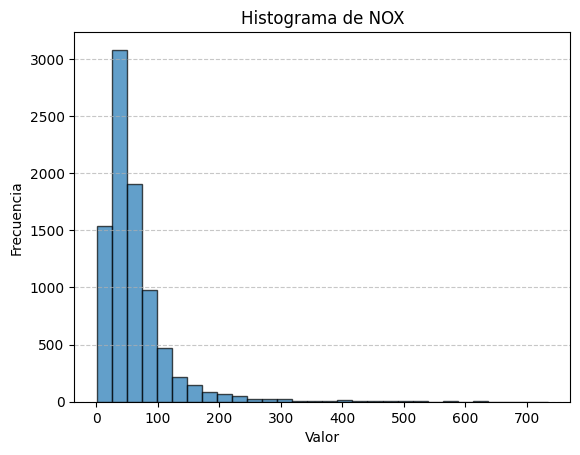

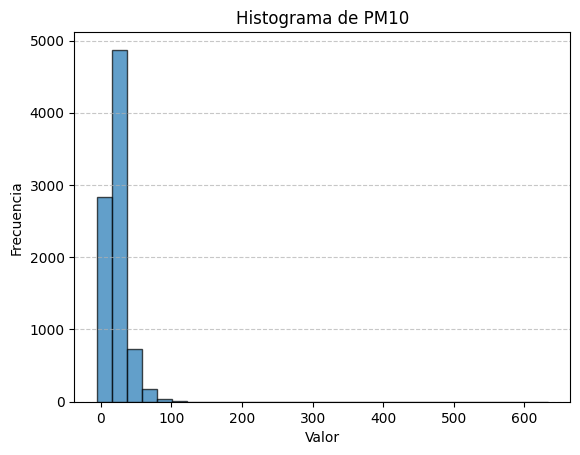

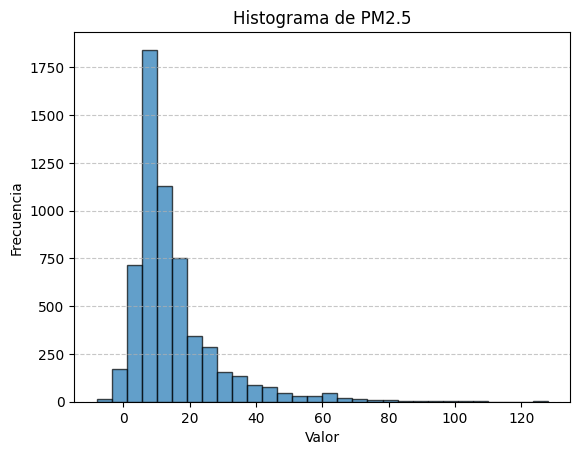

Contaminante con mayor variabilidad es:


('NOX', 54.58480508298361)

In [26]:
for column in pvt_df.columns:
    plt.figure()
    plt.hist(pvt_df[column].dropna(), bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Histograma de {column}')
    plt.xlabel('Valor')
    plt.ylabel('Frecuencia')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

variability = pvt_df.std()

print("Contaminante con mayor variabilidad es:")
max_variability = variability.idxmax()
max_variability_value = variability.max()

max_variability, max_variability_value

8.	Ejecuta el siguiente código y comenta qué hace cada línea:

---



In [22]:
datetime_df = air_df.ReadingDateTime.str.split(' ',expand=True)
datetime_df.columns = ['Date','Time']
datetime_df
date_df = datetime_df.Date.str.split('/',expand=True)
date_df.columns = ['Day','Month','Year']
date_df
air_df = air_df.join(date_df).join(datetime_df.Time).drop(columns=['ReadingDateTime','Year'])
air_df = air_df.set_index(['Month','Day','Time','Species'])
air_df

Site  Value   Units Provisional or Ratified
Month Day Time  Species                                            
01    01  00:00 NO       CT3    3.5  ug m-3                       R
          01:00 NO       CT3    3.6  ug m-3                       R
          02:00 NO       CT3    2.2  ug m-3                       R
          03:00 NO       CT3    2.1  ug m-3                       R
          04:00 NO       CT3    3.3  ug m-3                       R
...                      ...    ...     ...                     ...
12    31  19:00 PM2.5    CT3   -2.0  ug m-3                       R
          20:00 PM2.5    CT3    6.0  ug m-3                       R
          21:00 PM2.5    CT3    5.0  ug m-3                       R
          22:00 PM2.5    CT3    5.0  ug m-3                       R
          23:00 PM2.5    CT3    6.0  ug m-3                       R

[43800 rows x 4 columns]

# Divide la columna 'ReadingDateTime' en dos columnas separadas: 'Date' y 'Time',
# utilizando el espacio como delimitador, y crea un nuevo DataFrame 'datetime_df'.
datetime_df = air_df.ReadingDateTime.str.split(' ', expand=True)

# Renombra las columnas de 'datetime_df' a 'Date' y 'Time' para mayor claridad.
datetime_df.columns = ['Date', 'Time']

# Divide la columna 'Date' del DataFrame 'datetime_df' (que contiene fechas en formato DD/MM/YYYY)
# en tres columnas separadas: 'Day', 'Month', y 'Year'
date_df = datetime_df.Date.str.split('/', expand=True)

# Renombra las columnas de 'date_df' a 'Day', 'Month', y 'Year' para mayor claridad.
date_df.columns = ['Day', 'Month', 'Year']

# Une las columnas de 'date_df' ('Day', 'Month', 'Year') y 'Time' de 'datetime_df' al DataFrame original 'air_df'.
# Luego, elimina las columnas 'ReadingDateTime' (ya no es relevante o necesaria) y 'Year' .
air_df = air_df.join(date_df).join(datetime_df.Time).drop(columns=['ReadingDateTime', 'Year'])

# Reorganiza el DataFrame 'air_df' estableciendo un índice jerárquico con las columnas 'Month', 'Day', 'Time', y 'Species'.
# Esto facilita el análisis de los datos por estas dimensiones.
air_df = air_df.set_index(['Month', 'Day', 'Time', 'Species'])

# Devuelve el DataFrame final 'air_df' reorganizado y con un índice jerárquico.
air_df


\9. Ejecuta la siguiente instrucción y compara su salida con la del código anterior (ejercicio 8). ¿Son iguales?

In [27]:
air_df.unstack()

Site                      Value                          \
Species           NO  NO2  NOX PM10 PM2.5    NO   NO2   NOX  PM10 PM2.5   
Month Day Time                                                            
01    01  00:00  CT3  CT3  CT3  CT3   CT3   3.5  30.8  36.2  35.7   NaN   
          01:00  CT3  CT3  CT3  CT3   CT3   3.6  31.5  37.0  28.5   NaN   
          02:00  CT3  CT3  CT3  CT3   CT3   2.2  27.3  30.7  22.7   NaN   
          03:00  CT3  CT3  CT3  CT3   CT3   2.1  23.5  26.8  20.5   NaN   
          04:00  CT3  CT3  CT3  CT3   CT3   3.3  28.0  33.0  22.1   NaN   
...              ...  ...  ...  ...   ...   ...   ...   ...   ...   ...   
12    31  19:00  CT3  CT3  CT3  CT3   CT3   0.7  17.5  18.5  16.3  -2.0   
          20:00  CT3  CT3  CT3  CT3   CT3   0.7  17.5  18.6  14.5   6.0   
          21:00  CT3  CT3  CT3  CT3   CT3   0.7  14.1  15.1   8.6   5.0   
          22:00  CT3  CT3  CT3  CT3   CT3   1.1  22.0  23.6  12.5   5.0   
          23:00  CT3  CT3  CT3  CT3   CT3   0.9  19.4  20.7  10.4   6.0   

                  Units                                        \
Species              NO     NO2            NOX   PM10   PM2.5   
Month Day Time                                                  
01    01  00:00  ug m-3  ug m-3  ug m-3 as NO2  ug/m3  ug m-3   
          01:00  ug m-3  ug m-3  ug m-3 as NO2  ug/m3  ug m-3   
          02:00  ug m-3  ug m-3  ug m-3 as NO2  ug/m3  ug m-3   
          03:00  ug m-3  ug m-3  ug m-3 as NO2  ug/m3  ug m-3   
          04:00  ug m-3  ug m-3  ug m-3 as NO2  ug/m3  ug m-3   
...                 ...     ...            ...    ...     ...   
12    31  19:00  ug m-3  ug m-3  ug m-3 as NO2  ug/m3  ug m-3   
          20:00  ug m-3  ug m-3  ug m-3 as NO2  ug/m3  ug m-3   
          21:00  ug m-3  ug m-3  ug m-3 as NO2  ug/m3  ug m-3   
          22:00  ug m-3  ug m-3  ug m-3 as NO2  ug/m3  ug m-3   
          23:00  ug m-3  ug m-3  ug m-3 as NO2  ug/m3  ug m-3   

                Provisional or Ratified                     
Species                              NO NO2 NOX PM10 PM2.5  
Month Day Time                                              
01    01  00:00                       R   R   R    R     R  
          01:00                       R   R   R    R     R  
          02:00                       R   R   R    R     R  
          03:00                       R   R   R    R     R  
          04:00                       R   R   R    R     R  
...                                 ...  ..  ..  ...   ...  
12    31  19:00                       R   R   R    R     R  
          20:00                       R   R   R    R     R  
          21:00                       R   R   R    R     R  
          22:00                       R   R   R    R     R  
          23:00                       R   R   R    R     R  

[8760 rows x 20 columns]


No son lo mismo porque set_index organiza el DataFrame creando un índice jerarquico, mientras que unstack convierte un nivel del indice en columnas, transformando la estructura de los datos

10.	Explica cuáles son las diferencias y similitudes entre el par `melt()/pivot()` y el par `stack()/unstack()`. Si tuvieras que elegir una contraparte para `melt()` entre `stack()/unstack()`, ¿cuál elegirías? ¿Por qué?

Las funciones melt() y pivot() trabajan para reorganizar DataFrames cambiando entre formatos "ancho" y "largo". melt() toma columnas y las transforma en filas, haciendo los datos más largos y fáciles de analizar para ciertas tareas. pivot(), en cambio, convierte datos largos en anchos, creando tablas más estructuradas para reportes o visualizaciones. Por otro lado, stack() y unstack() también reorganizan datos, pero en lugar de trabajar con columnas directamente, operan sobre índices. stack() convierte columnas en niveles de índice, compactando los datos, mientras que unstack() hace lo opuesto: mueve niveles del índice a columnas, expandiendo el DataFrame. Si tuviera que elegir una contraparte de melt(), sería stack(), porque ambos transforman datos de un formato más ancho a uno más compacto, aunque lo hacen de formas ligeramente diferentes.







